In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
import warnings; warnings.simplefilter('ignore')
import matplotlib
import matplotlib.pyplot as plt
import rstoolbox
import pandas as pd
import seaborn as sns
import numpy as np
import copy
import glob
import os

sns.set(font_scale=1.5)
matplotlib.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [4]:
def make_pyramid_table(df, sse):
    data = {"groups":   sse,
            "template": [0] * len(sse),
            "query":    [0] * len(sse)
           }
    total = df.shape[0]
    for i, s in enumerate(sse):
        data["query"][i]    = (df[df[s]==True].shape[0] / float(total))
        data["template"][i] = (df[df[s]==False].shape[0] / float(total)) * -1
    return pd.DataFrame(data)

In [5]:
def plot_pyramid(wdf1, wdf2, sselist, rmsd_max, filename=None):
    fig  = plt.figure(figsize=(20, 5))
    grid = (1, 5)
    ax11 = plt.subplot2grid(grid, (0, 0), colspan=3)
    sns.barplot(x="template",y="groups",data=wdf1, ax=ax11)
    sns.barplot(x="query",y="groups",data=wdf1, ax=ax11)
    ax11.set_xlim(-1, 1)
    ax11.set_xlabel("decoys")
    ax11.set_ylabel("secondary structure")
    ax11.set_yticklabels(sselist)
    ax11.set_xticklabels([1, 0.75, 0.5, 0.25, 0, 0.25, 0.5, 0.75, 1])
    ax11.axvline(x=0, ymin=0, ymax=3, c="black", linewidth=2, zorder=10)
    ax11.annotate("Template   |   Query     ", xy=(0.5, 1), xytext=(0, 5),
                    xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')
    ax12 = plt.subplot2grid(grid, (0, 3))
    sns.boxplot(x="source", y="rmsd", data=wdf2[(wdf2["sse"]=="global")], showfliers=False, ax=ax12, order=["template", "query"])
    ax12.set_ylim(0, rmsd_max)
    ax12.annotate("Global RMSD", xy=(0.5, 1), xytext=(0, 5),
                    xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')
    ax22 = plt.subplot2grid(grid, (0, 4))
    sns.boxplot(x="source", y="rmsd", data=wdf2[(wdf2["sse"]=="sseA")],  showfliers=False, ax=ax22, order=["template", "query"])
    ax22.set_ylim(0, rmsd_max)
    ax22.annotate("Aligned by Motif RMSD", xy=(0.5, 1), xytext=(0, 5),
                    xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')

    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    sns.plt.show()

In [6]:
def plot_boxplots( df, rmsd_max, filename=None ):
    fig = plt.figure(figsize=(35, 20))
    ax1 = plt.subplot2grid((1,2), (0, 0))
    ax2 = plt.subplot2grid((1,2), (0, 1))
    sns.boxplot(x="sse", y="rmsd", data=df[df["source"] == "template"], 
                showfliers=False, ax=ax1)
    sns.boxplot(x="sse", y="rmsd", data=df[df["source"] == "query"],
                showfliers=False, ax=ax2)
    ax1.set_ylim(0, rmsd_max)
    ax1.annotate("to Template", xy=(0.5, 1), xytext=(0, 5), xycoords='axes fraction',
                 textcoords='offset points', ha='center', va='baseline')
    ax2.set_ylim(0, rmsd_max)
    ax2.annotate("to Query", xy=(0.5, 1), xytext=(0, 5), xycoords='axes fraction',
                 textcoords='offset points', ha='center', va='baseline')
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    sns.plt.show()

# PF00586

The main issue with this example is that, actually, insertions can be considered both ways and is, thus, difficult to evaluate.

## Pfam Alignment

|  id   |         pdb    |        name   | seq |
|:-----:|:--------------:|:-------------:|:----|
|PF00586|3FD6B;<br>60-180|   SPS1_HUMAN  |   ```.................vmprlgigmdtcviplrhgglsLVQTTDYIYPIVDDPYMM.................GRIACANVLSDLYAMGVTECdNMLMLLGVSnkmtdrerdkVMPLIIQGFKDAAEEAGTSVTGGQTVLNPW......IVLG.......gvattvc```|
|PF00586|3P4EA;<br>18-165|PUR5_VIBCH|    ```dagnalverikgavkrtrrpevmgglggfgalcelptky.......KHPVLVSGTDGvgtklrlaldmkkhdtIGIDLVAMCVNDLIVQGAEPL.FFLDYYATGkl.....dvdTAAEVISGIADGCLQAGCALIGGETAEMPGmyegedYDVAGFCVGVV.......```|



## Design Alignment
|||
|---|---|
|__```SEQUENCE```__   |    ```DTCVIPLRHGGLSLVQTTDYVGTKLRLALDMKKHDTIGRIACANVLSDLYAMGVTECDNMLMLLGVSNKMTDRERDKVMPLIIQGFKDAAEEAGTSVTGGQTVLNPWIVLGGVATTVC```|
|__```STRUCTURE```__  |    ```LLEEEELLLLLLEEEEEEEELHHHHHHHHHLLLLLLHHHHHHHHHHHHHHHLLLLLLEEEEEEEEELLLLHHHHHHHHHHHHHHHHHHHHHLLLLEEEEEEEEELLLEEEEEEEEELL```|
|__```FLEXIBLE```__   |    ```····················**·············**·················································································```|
|__```HOTSPOT```__    |    ```····················*****************·················································································```|
|__```MOTIF```__      |    ```····················*****************·················································································```|
|__```TEMPLATE```__   |    ```********************·················*********************************************************************************```|
|__```CONSTRAINTS```__|    ```********************·················*********************************************************************************```|
|__```MVMP_BB```__    |    ```**********************.............***********************************************************************************```|
|__```MVMP_CHI```__   |    ```********************.................*********************************************************************************```|

## Structure View

|        template          |    query(motif source)   |
|:------------------------:|:------------------------:|
|        __3FD6B__         |        __3P4EA__         |
|![3fd6B](images/3fd6B.png)|![3p4eA](images/3p4eA.png)|


In [7]:
pf00586 = rstoolbox.io.parse_rosetta_file("pf00586/pf00586.minisilent.gz")
pf00586 = pf00586.assign(counterID=pd.Series(range(0,pf00586.shape[0] + 1)))
pf00586 = pf00586.assign(sse1=pf00586.tmpb1<=pf00586.smpb1,
                         sse2=pf00586.tmpb2<=pf00586.smpb2,
                         sse3=pf00586.tmpb3<=pf00586.smpb3,
                         sseA=pf00586.tmpbA<=pf00586.smpbA)
pf00586.head()

,A_ni_mtcontacts,A_ni_rmsd,A_ni_rmsd_threshold,A_ni_rmsd_type,A_ni_trials,BUNS,cav_vol,description,design_score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,omega,p_aa_pp,packstat,pro_close,rama,ref,rmsd_drift,score,sglob,smpb1,smpb2,smpb3,smpb4,smpbA,time,tmpb1,tmpb2,tmpb3,tmpb4,tmpbA,yhh_planarity,counterID,sse1,sse2,sse3,sseA
0,31.0,0.453,5.0,no_motif,1.0,29.0,142.101,3fd6B_0001,-217.709,0.0,-537.263,157.683,-67.181,1.003,62.420,302.675,-10.609,-26.032,-13.570,-33.308,10.741,-23.869,0.579,0.539,-8.397,-10.752,2.382,-195.900,2.324,3.849,2.954,4.127,2.595,3.439,1507.0,7.281,4.151,4.818,3.279,5.104,0.021,0,False,False,False,False
1,31.0,1.756,5.0,no_motif,1.0,27.0,104.590,3fd6B_0002,-174.198,0.0,-527.409,163.855,-64.848,1.081,60.766,309.330,-13.521,-13.300,-13.644,-32.627,12.218,-32.129,0.613,0.113,5.562,-12.838,3.513,-157.319,3.842,5.521,4.260,4.614,5.359,4.966,1285.0,9.363,4.944,3.449,5.212,6.148,0.071,1,False,False,True,False
2,31.0,1.429,5.0,no_motif,1.0,31.0,111.976,3fd6B_0003,-210.813,0.0,-513.163,152.361,-67.759,1.075,54.333,299.725,-15.774,-15.582,-16.330,-34.697,10.306,-38.797,0.559,0.305,2.458,-10.941,2.184,-192.335,2.837,4.456,5.751,4.178,6.596,5.336,1302.0,8.313,5.052,3.866,6.956,6.284,0.145,2,False,True,True,False
3,34.0,0.545,5.0,no_motif,1.0,27.0,69.429,3fd6B_0004,-207.371,0.0,-554.353,167.248,-65.954,1.206,55.586,318.788,-13.460,-23.298,-13.703,-33.243,11.185,-23.632,0.583,0.028,-7.809,-5.196,1.618,-186.591,1.691,1.835,3.151,5.240,2.538,3.435,1387.0,5.241,5.222,5.767,3.037,4.930,0.013,3,False,False,False,False
4,29.0,1.268,5.0,no_motif,1.0,31.0,128.014,3fd6B_0005,-217.687,0.0,-567.643,180.909,-83.487,1.341,54.919,340.185,-12.181,-18.653,-17.769,-33.830,10.548,-31.875,0.559,0.030,0.010,-20.972,1.992,-198.398,2.441,3.153,2.470,2.583,4.818,3.388,1417.0,6.042,4.194,3.939,5.027,4.870,0.070,4,False,False,False,False


In [8]:
sp = {"keep":["counterID"],
      "split":[("smpb1", "template", "sse1"),("smpb2", "template", "sse2"),
               ("smpb3","template","sse3"),("smpb4", "template", "sse4"),
               ("tmpb1", "query", "sse1"),("tmpb2","query", "sse2"),
               ("tmpb3", "query", "sse3"),("tmpb4", "query", "sse4"),
               ("tmpbA", "query", "sseA"),("smpb4", "template", "sseA"),
               ("sglob", "query", "global"), ("A_ni_rmsd", "template", "global")],
      "names":["rmsd", "source", "sse"]
     } 
pf00586_split = rstoolbox.utils.split_values(pf00586, sp)
pf00586_pyr   = make_pyramid_table(pf00586, ["sse1", "sse2", "sse3", "sseA"])

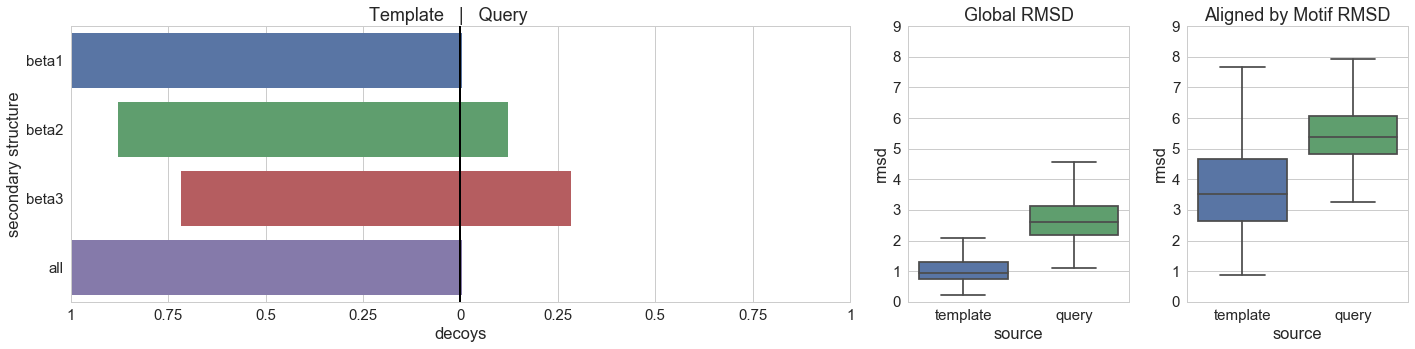

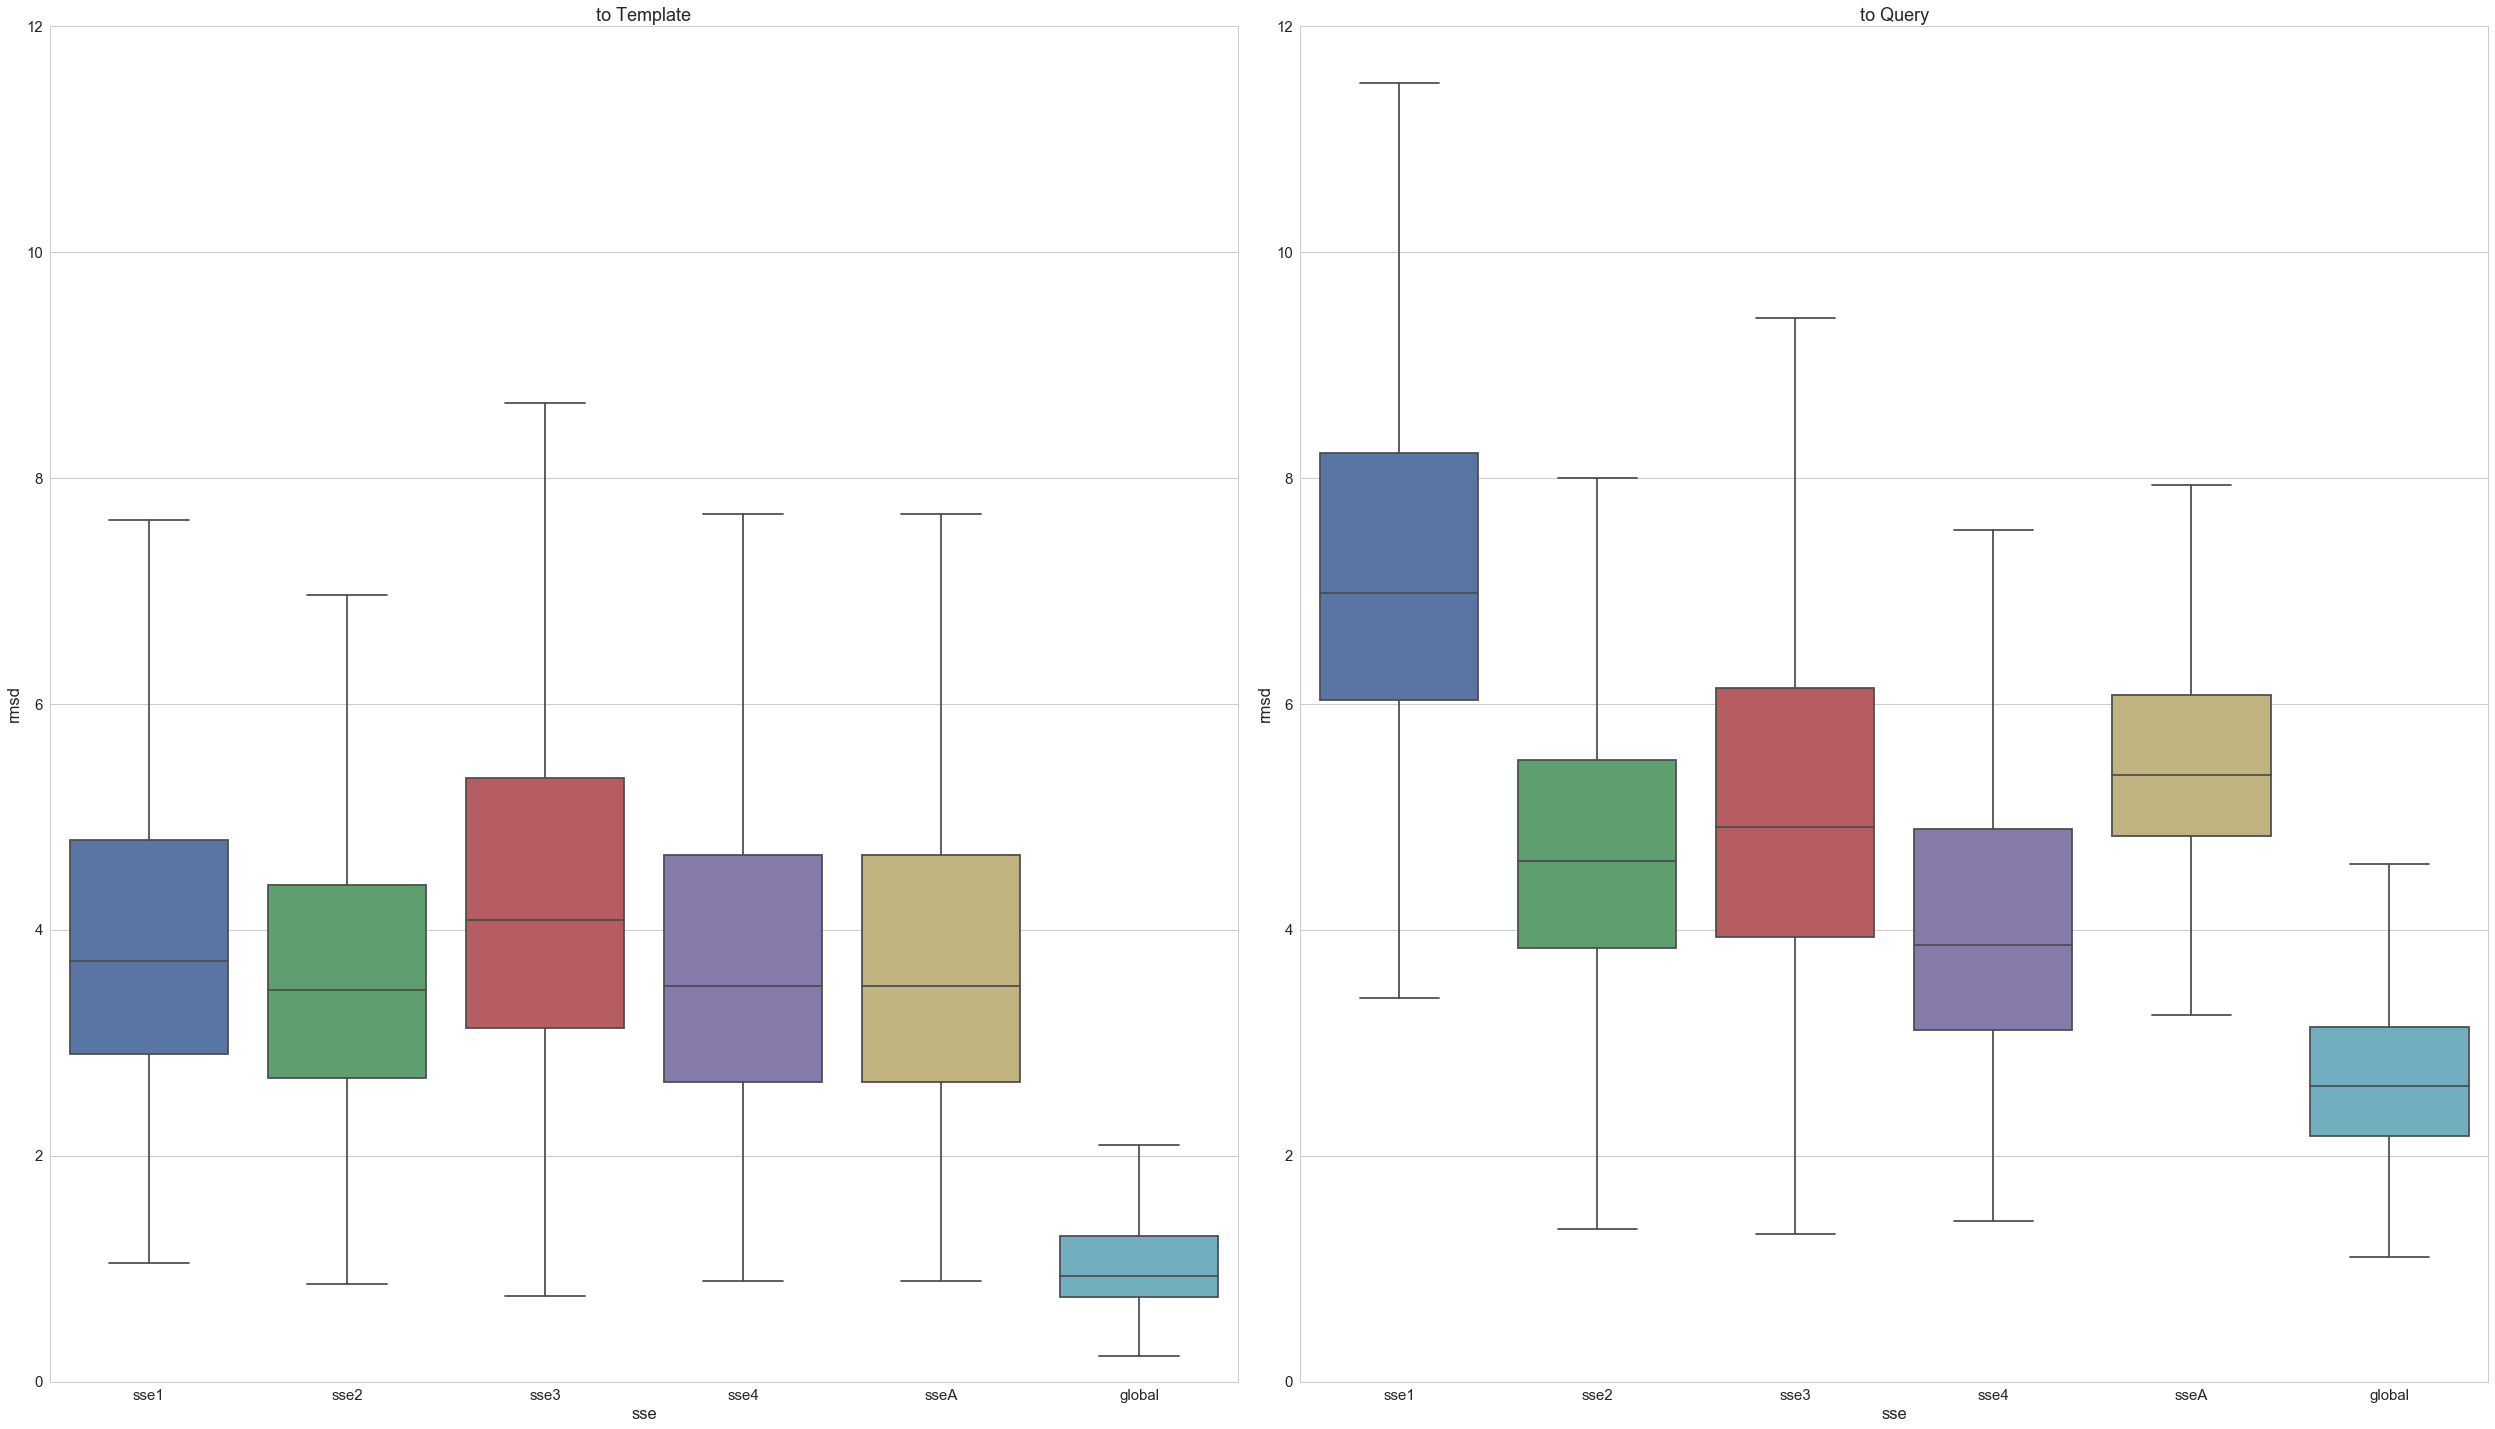

In [9]:
plot_pyramid(pf00586_pyr, pf00586_split, ["beta1", "beta2", "beta3", "all"], 9)
plot_boxplots(pf00586_split, 12)

# PF00781

## Pfam Alignment

|  id   |         pdb    |    name   | seq |
|:-----:|:--------------:|:---------:|:----|
|PF00781|3VZDC;<br>16-155|SPHK1_HUMAN| ```RVLVLLNPRGGKGKALQLFrSHVQPLLAEAEISFTLMLTERRNHARELVRSEELGRWDALVVMSGDGLMHEVVNGLMErpdwETAIQKPLCSLPAGSGNALAASLnhyagyeQVTNeDLLTNC...............tlllcrrllspmnllsl```|
|PF00781|3S40A;<br>8-131|Q81KC6_BACAN|```KVLLIVNPKAGQGDLHTNL.TKIVPPLAAAFPDLHILHTKEQGDATKYCQEFAS.KVDLIIVFGGDGTVFECTNGLAP.....LEIRPTLAIIPGGTCNDFSRTL.......GVPQ.NIAEAAKLITKEHVKPVDVAKa................```|

## Design Alignment
### Mode A
|||
|---|---|
|__```SEQUENCE```__|       ```KVLLIVNPKAGQGDLHTNFRSKIVPPLAAAFPDLHILHTKEQGDATKYCQEFALGRVDLIIVFGGDGTVFECTNGLMERPDWETAIQKTLAIIPGGTCNDFSRTLNHYAGYEQVTNEDEAAKLIT```|
|__```STRUCTURE```__|      ```LEEEEELLLLLLLLHHHHHHHHHHHHHHHLLLEEEEELLLLLLHHHHHHHHHLHHLLLEEEEEELHHHHHHHHHHHHHLLLHHHHHHEEEEEELLLLLLHHHHHHHHHLLLLLLLHHHHHHHHLL```|
|__```FLEXIBLE```__|       ```··················*·*································*·*···················**·········**················*············*·······```|
|__```HOTSPOT```__|        ```··················***································***···················*************················**************·······```|
|__```MOTIF```__|          ```··················***································***···················*************················**************·······```|
|__```TEMPLATE```__|       ```******************···********************************···*******************·············****************··············*******```|
|__```CONSTRAINTS```__|    ```******************···********************************···*******************·············****************··············*******```|
|__```MVMP_BB```__|        ```*******************.**********************************.**********************.........*******************............********```|
|__```MVMP_CHI```__|       ```******************...********************************...*******************.............****************..............*******```|
### Mode B
|||
|---|---|
|__```SEQUENCE```__|       ```KVLLIVNPKAGQGDLHTNLTKIVPPLAAAFPDLHILHTKEQGDATKYCQEFASKVDLIIVFGGDGTVFECTNGLMERPDWETAIQKTLAIIPGGTCNDFSRTLNHYAGYEQNIAEAAKLIT```|
|__```STRUCTURE```__|      ```LEEEEELLLLLLLLHHHHHHHHHHHHHHHLLLEEEEELLLLLHHHHHHHHHLLLLLEEEEEELHHHHHHHHHHHHHLLLHHHHHHEEEEEELLLLLLHHHHHHHHHLLLLLHHHHHHHHLL```|
|__```FLEXIBLE```__|       ```·········································································**·········**················*·······*··········```|
|__```HOTSPOT```__|        ```·········································································*************················*********··········```|
|__```MOTIF```__|          ```·········································································*************················*********··········```|
|__```TEMPLATE```__|       ```*************************************************************************·············****************·········**********```|
|__```CONSTRAINTS```__|    ```*************************************************************************·············****************·········**********```|
|__```MVMP_BB```__|        ```***************************************************************************.........*******************.......***********```|
|__```MVMP_CHI```__|       ```*************************************************************************.............****************.........**********```|

## Structure View

|        template          |    query(motif source)   |
|:------------------------:|:------------------------:|
|        __3S40A__         |        __3VZDC__         |
|![3s40A](pf00781/images/3s40A.png)|![3vzdC](pf00781/images/3vzdC.png)|


In [10]:
pf00781 = rstoolbox.io.parse_rosetta_file("pf00781/pf00781*.minisilent.gz", multi=True)
pf00781 = pf00781.assign(counterID=pd.Series(range(0,pf00781.shape[0] + 1)))
pf00781 = pf00781.assign(sse1=pf00781.rmsdQ1<=pf00781.rmsdT1,
                         sse2=pf00781.rmsdQ2<=pf00781.rmsdT2,
                         sse3=pf00781.rmsdQ3<=pf00781.rmsdT3,
                         sse4=pf00781.rmsdQ4<=pf00781.rmsdT4,
                         sse5=pf00781.rmsdQ5<=pf00781.rmsdT5,
                         sse6=pf00781.rmsdQ6<=pf00781.rmsdT6,
                         sse7=pf00781.rmsdQ7<=pf00781.rmsdT7,
                         sse8=pf00781.rmsdQ8<=pf00781.rmsdT8,
                         sse9=pf00781.rmsdQ9<=pf00781.rmsdT9,
                         sseA=pf00781.rmsdQA<=pf00781.rmsdTA)
pf00781.head()

,BUNS,C_ni_mtcontacts,C_ni_rmsd,C_ni_rmsd_threshold,C_ni_rmsd_type,C_ni_trials,FFL,cav_vol,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,loop_chain_score,loop_overlap_score,loop_total_score,loop_vdw_score,looprms,niccd_break_side,niccd_trials,omega,p_aa_pp,packstat,pro_close,qglob,rama,ref,rmsdQ1,rmsdQ2,rmsdQ3,rmsdQ4,rmsdQ5,rmsdQ6,rmsdQ7,rmsdQ8,rmsdQ9,rmsdQA,rmsdT1,rmsdT2,rmsdT3,rmsdT4,rmsdT5,rmsdT6,rmsdT7,rmsdT8,rmsdT9,rmsdTA,score,tglob,time,yhh_planarity,counterID,sse1,sse2,sse3,sse4,sse5,sse6,sse7,sse8,sse9,sseA
0,38.0,49.0,1.140,5.0,no_motif,1.0,FFLA,260.526,3s40A_0001,0.0,-475.043,180.144,-28.345,1.102,934.438,281.950,-1.647,-8.724,-6.701,-27.801,0.413,0.340,19.363,-92.425,-1.0,3.0,1.0,249.437,-11.546,0.392,4.986,3.019,13.495,-5.790,1.412,3.022,2.326,4.626,3.062,0.444,3.001,1.136,3.427,3.275,2.408,4.545,4.600,4.189,2.955,0.443,3.949,4.078,7.275,4.138,1099.954,2.791,1237.0,0.000,0,True,True,True,False,False,False,True,True,True,True
1,36.0,52.0,0.742,5.0,no_motif,1.0,FFLA,191.401,3s40A_0002,0.0,-523.723,203.712,-39.214,1.289,106.570,292.761,-4.878,-15.195,-7.951,-28.732,0.470,0.394,10.811,-1.797,-1.0,3.0,1.0,139.738,-13.048,0.486,4.568,2.850,3.564,-8.202,3.920,2.991,5.148,4.138,2.965,1.294,2.553,2.185,3.401,3.711,4.624,6.156,7.804,4.147,4.119,1.299,3.397,4.635,6.806,5.285,111.272,2.592,1497.0,0.013,1,True,True,True,True,True,True,True,True,True,True
2,30.0,53.0,0.647,5.0,no_motif,1.0,FFLA,229.650,3s40A_0003,0.0,-525.634,198.622,-36.087,1.203,133.532,298.459,-5.974,-14.595,-9.089,-30.198,0.625,0.531,7.111,0.000,-1.0,3.0,1.0,158.994,-14.063,0.468,4.657,2.382,5.910,-3.436,1.682,2.427,1.968,2.886,1.366,1.223,0.733,2.764,3.763,2.518,3.317,4.281,4.454,2.680,3.361,1.200,2.808,4.770,5.631,3.708,162.301,1.728,1412.0,0.000,2,True,True,True,False,True,False,True,True,True,True
3,39.0,42.0,1.166,5.0,no_motif,1.0,FFLA,453.888,3s40A_0005,0.0,-426.318,178.857,-29.579,1.000,1409.765,262.660,-6.957,-3.144,-3.348,-24.614,0.576,0.489,96.877,-58.432,-1.0,12.0,1.0,206.159,0.999,0.313,6.784,3.871,13.815,-14.233,6.602,2.630,6.472,7.131,2.912,0.757,1.745,2.893,3.700,4.742,6.564,5.793,8.657,6.745,3.269,0.743,2.005,3.436,5.961,5.559,1571.846,3.580,1208.0,0.000,3,False,True,True,False,True,False,True,True,True,True
4,47.0,50.0,0.822,5.0,no_motif,1.0,FFLA,313.194,3s40A_0007,0.0,-475.913,198.637,-34.265,1.193,210.064,275.257,-3.465,-8.990,-6.022,-27.237,0.501,0.404,17.422,-8.304,-1.0,12.0,1.0,157.526,-6.636,0.306,5.238,3.197,11.461,-9.394,4.461,3.141,5.062,5.320,4.243,0.634,2.823,3.433,3.718,3.999,5.208,5.535,7.107,5.181,4.764,0.673,3.947,6.434,6.053,5.366,287.454,2.907,1527.0,0.000,4,True,True,True,False,True,True,True,True,True,True


In [11]:
sp = {"keep":["FFL", "counterID"],
      "split":[("rmsdQ1", "query", "sse1"),("rmsdQ2", "query", "sse2"),
               ("rmsdQ3", "query", "sse3"),("rmsdQ4", "query", "sse4"),
               ("rmsdQ5", "query", "sse5"),("rmsdQ6", "query", "sse6"),
               ("rmsdQ7", "query", "sse7"),("rmsdQ8", "query", "sse8"),
               ("rmsdQ9", "query", "sse9"),("rmsdQA", "query", "sseA"),
               ("rmsdT1", "template", "sse1"),("rmsdT2", "template", "sse2"),
               ("rmsdT3", "template", "sse3"),("rmsdT4", "template", "sse4"),
               ("rmsdT5", "template", "sse5"),("rmsdT6", "template", "sse6"),
               ("rmsdT7", "template", "sse7"),("rmsdT8", "template", "sse8"),
               ("rmsdT9", "template", "sse9"),("rmsdTA", "template", "sseA"),
               ("tglob", "template", "global"),("qglob", "query", "global")],
      "names":["rmsd", "source", "sse"]
     } 

pf00781_split = rstoolbox.utils.split_values(pf00781, sp)
tmp1 = make_pyramid_table(pf00781[pf00781["FFL"]=="FFLA"],
                          ["sse1", "sse2", "sse3", "sse4", "sse5", "sse6", "sse7", "sse8", "sse9", "sseA"])
tmp1 = rstoolbox.utils.add_column(tmp1, "FFL", "FFLA")
tmp2 = make_pyramid_table(pf00781[pf00781["FFL"]=="FFLB"],
                          ["sse1", "sse2", "sse3", "sse4", "sse5", "sse6", "sse7", "sse8", "sse9", "sseA"])
tmp2 = rstoolbox.utils.add_column(tmp2, "FFL", "FFLB")
pf00781_pyr = pd.concat([tmp1, tmp2])

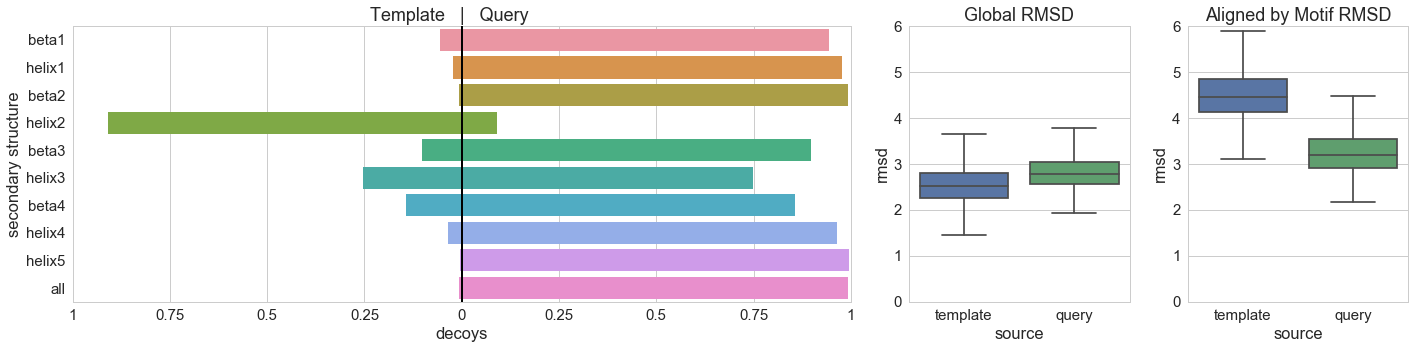

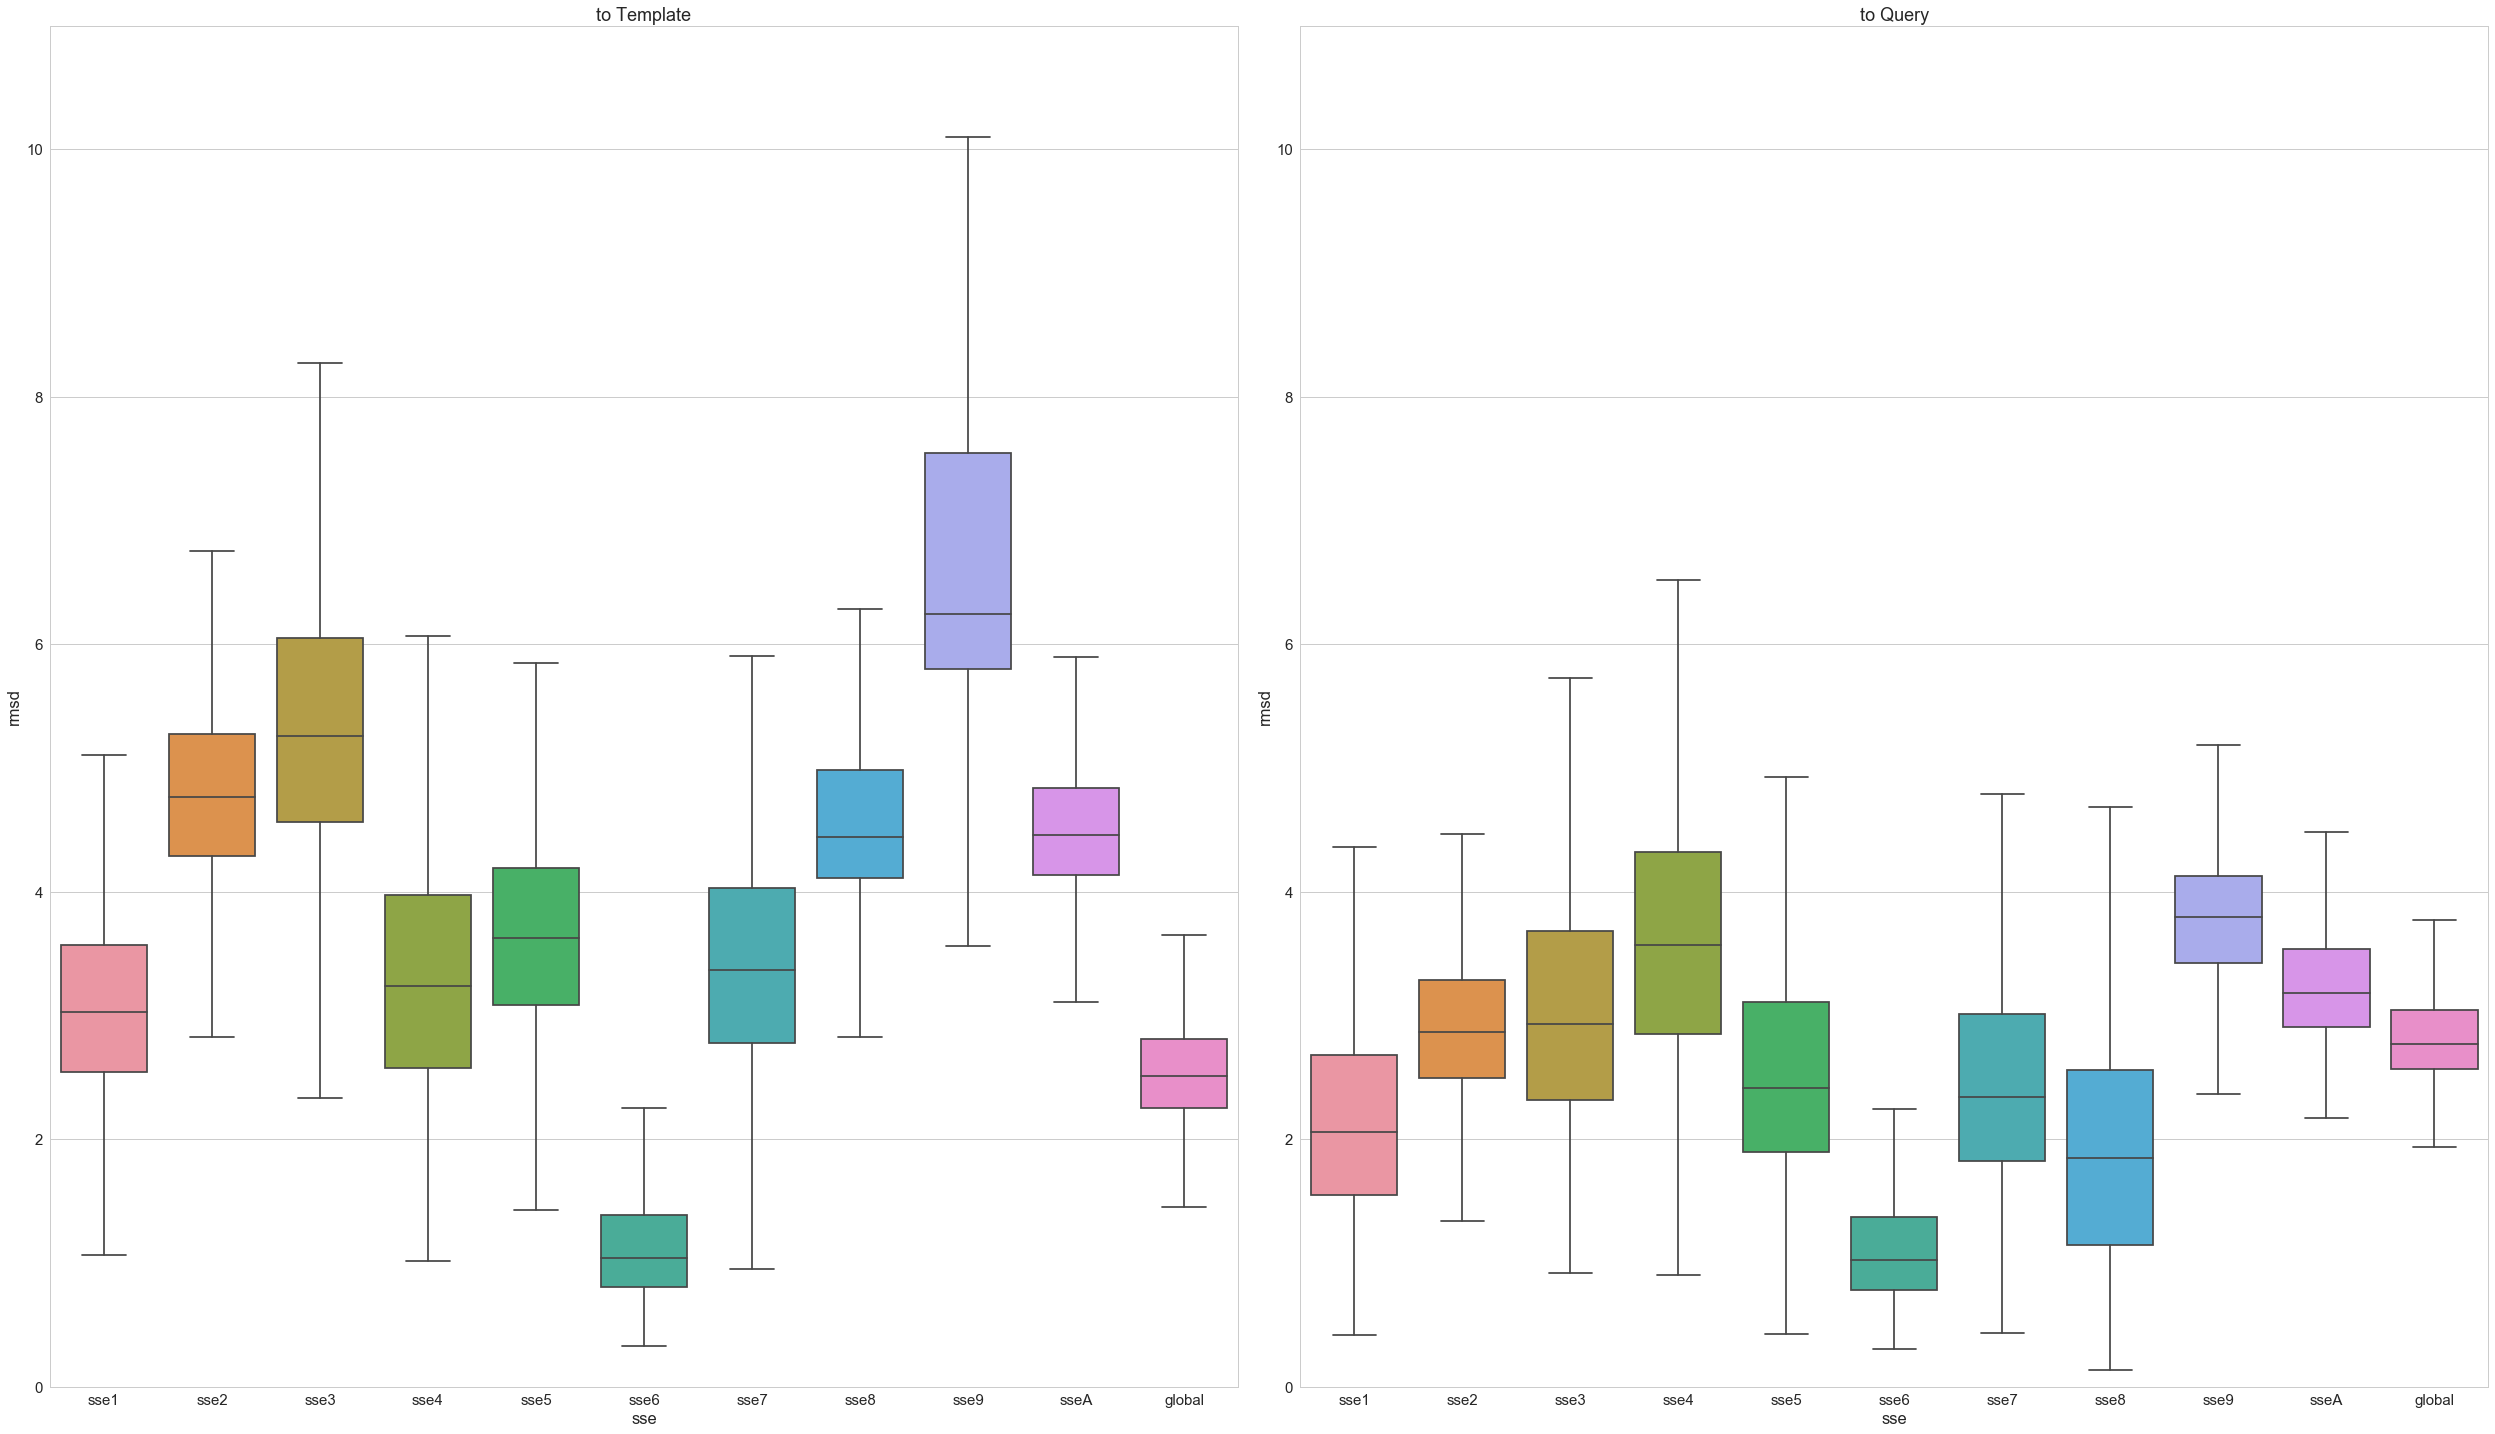

In [12]:
plot_pyramid(pf00781_pyr[pf00781_pyr["FFL"]=="FFLA"],
             pf00781_split[(pf00781_split["FFL"]=="FFLA")],
            ["beta1", "helix1", "beta2", "helix2", "beta3", "helix3", "beta4", "helix4", "helix5", "all"], 6)
plot_boxplots(pf00781_split[(pf00781_split["FFL"]=="FFLA")], 11)

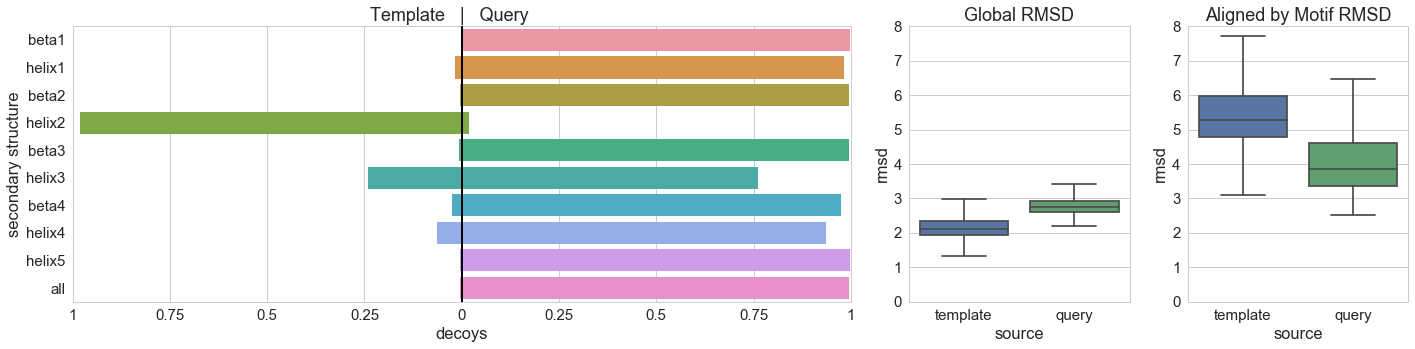

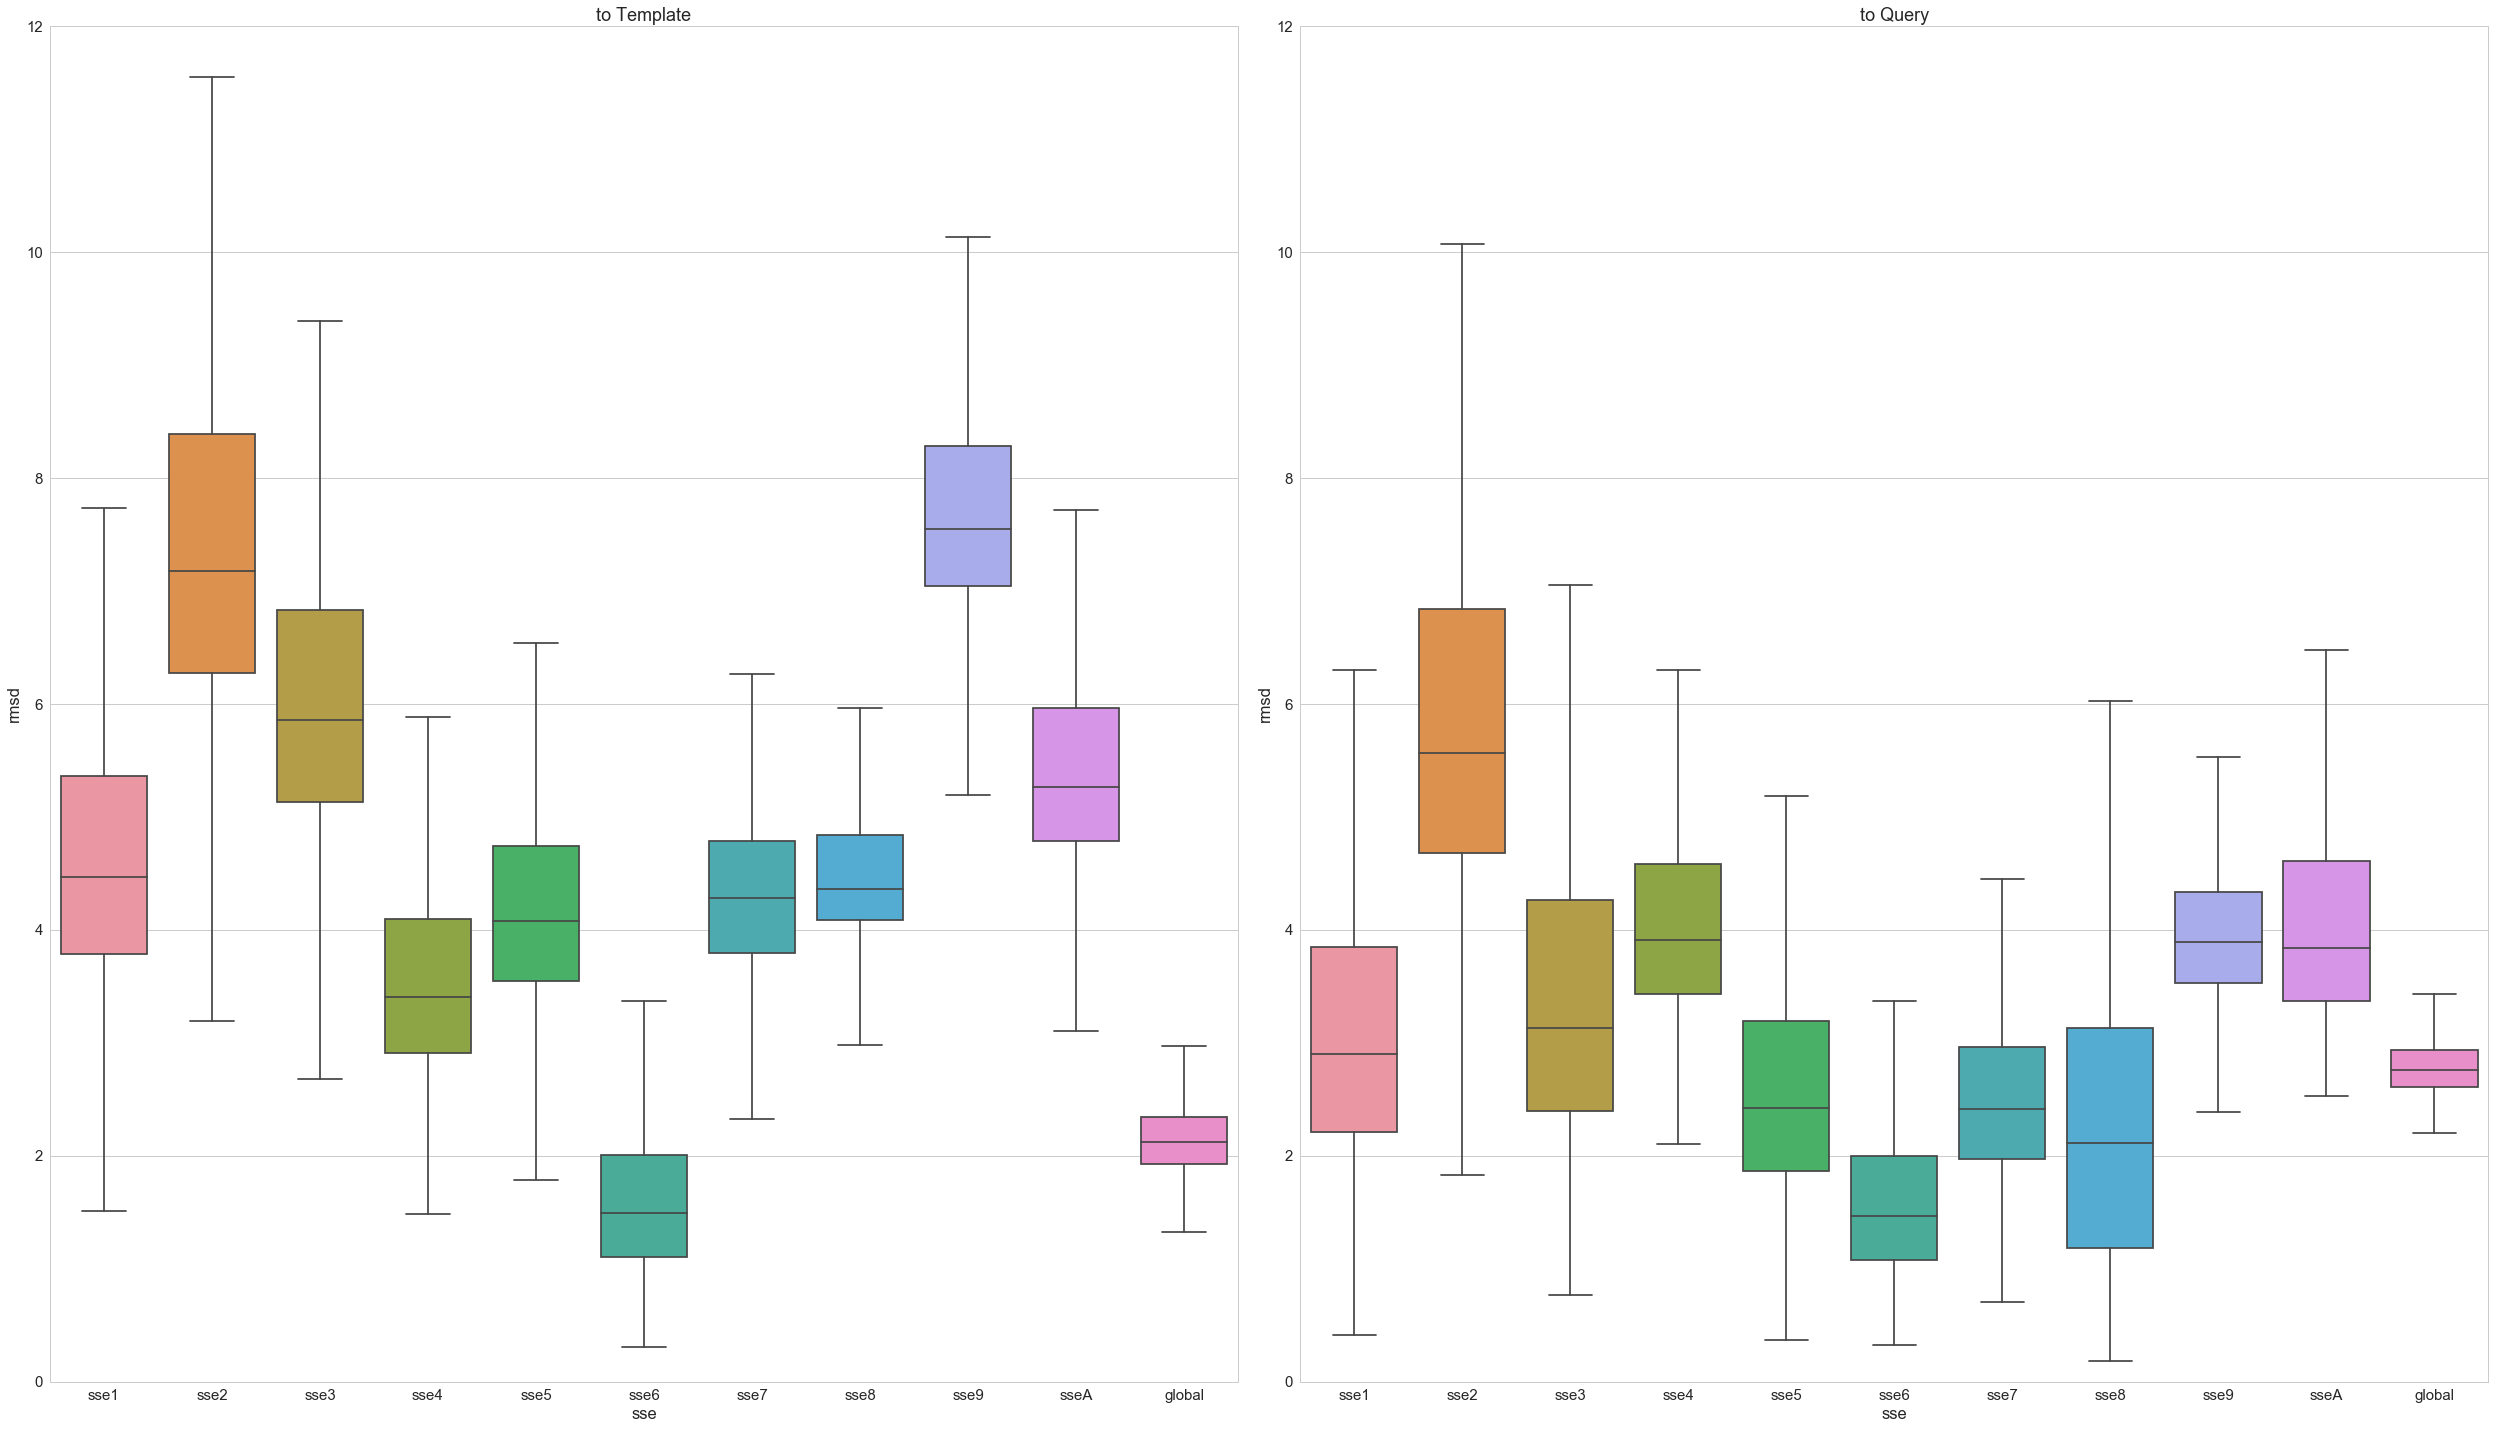

In [13]:
plot_pyramid(pf00781_pyr[pf00781_pyr["FFL"]=="FFLB"],
             pf00781_split[(pf00781_split["FFL"]=="FFLB")],
            ["beta1", "helix1", "beta2", "helix2", "beta3", "helix3", "beta4", "helix4", "helix5", "all"], 8)
plot_boxplots(pf00781_split[(pf00781_split["FFL"]=="FFLB")], 12)

# PF01111

## Pfam Alignment

|  id   |         pdb    |    name   | seq |
|:-----:|:--------------:|:---------:|:----|
|PF01111|4LPAA;<br>28-104|CKS1_YEAST|```IHYSPRYSDDNYEYRHVMLPKAMLKVIPSDyfnsevgtlRILTEDEWRGLGITQSLGWEHYECHAPEPHILLFKRPl```|
|PF01111|1DKSB;<br>6-73  |CKS1_HUMAN|```IYYSDKYDDEEFEYRHVMLPKDIAKLVPKT.........HLMSESEWRNLGVQQSQGWVHYMIHEPEPHILLFRRPl```| 

## Design Alignment

|||
|---|---|
|__```SEQUENCE```__|```IYYSDKYDDEEFEYRHVMLPKDIAKLVPSDYFNSEVGTLRIMSESEWRNLGVQQSQGWVHYMIHEPEPHILLFRRPL```|
|__```STRUCTURE```__|```LEELLLEELLLEEEEEEELLHHHHHHLLHHHELLLLLLELLLHHHHHHHLLLLLLLLEEEELLLLLLLEEEEELELL```|
|__```FLEXIBLE```__|```····························*···········*····································```|
|__```HOTSPOT```__|```····························*************····································```|
|__```MOTIF```__|```····························*************····································```|
|__```TEMPLATE```__|```****************************·············************************************```|
|__```CONSTRAINTS```__|```****************************·············************************************```|
|__```MVMP_BB```__|```*****************************...........*************************************```|
|__```MVMP_CHI```__|```****************************.............************************************```|

## Structure View

|        template          |    query(motif source)   |
|:------------------------:|:------------------------:|
|        __1DKSB__         |        __4LPAA__         |
|![1dksB](pf01111/images/1dksB.png)|![4lpaA](pf01111/images/4lpaA.png)|

# PF02179

## Pfam Alignment

|  id   |         pdb    |    name   | seq |
|:-----:|:--------------:|:---------:|:----|
|PF02179|4HWCF;<br>161-237|BAG1_ARATH| ```...........ISDISLEVDRL.GGRVSAFEMVTkkg............gkiA.EKD.LVtVIELLMNELIKLDAIVAEGD...VKLQRKMQVKRVQNYVETLDAl```|
|PF02179|3FZMB;<br>155-254|BAG1_HUMAN| ```eevelkklkhl....EKSVEKI.ADQLEELNKELtgiqqgflpkdlqaealcKLDRRVKA.TIEQFMKILEEIDTLILPENfKDSRLKRKGLVKKVQAFLAECDTv```|  

## Design Alignment
### Mode A
|||
|---|---|
|__```SEQUENCE```__|```ISDISLEVDRLGGRVSAFEMVTTGIQQGFLPKDLQAEALCKDLVTVIELLMNELIKLDAIVAEENFKDSRLQRKMQVKRVQNYVETLDAL```|
|__```STRUCTURE```__|```LHHHHHHHHHHHHHHHHHHHHHHHHLLLLLLHHHHHHHHHHHHHHHHHHHHHHHHHHHLLLLLLLLHHHHHHHHHHHHHHHHHHHHHHLL```|
|__```FLEXIBLE```__|```······················*················*·······················*·····*····················```|
|__```HOTSPOT```__|```······················******************·······················*******····················```|
|__```MOTIF```__|```······················******************·······················*******····················```|
|__```TEMPLATE```__|```**********************··················***********************·······********************```|
|__```CONSTRAINTS```__|```**********************··················***********************·······********************```|
|__```MVMP_BB```__|```***********************................*************************.....*********************```|
|__```MVMP_CHI```__|```**********************..................***********************.......********************```|

### Mode B
|||
|---|---|
|__```SEQUENCE```__|```ISDISLEVDRLGGRVSAFEMVTTGIQQGFLPKDLQAEALCKDLVTVIELLMNELIKLDAIVAEGDVKLQRKMQVKRVQNYVETLDAL```|
|__```STRUCTURE```__|```LHHHHHHHHHHHHHHHHHHHHHHHHLLLLLLHHHHHHHHHHHHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHHHHHLL```|
|__```FLEXIBLE```__|```······················*················*···············································```|
|__```HOTSPOT```__|```······················******************···············································```|
|__```MOTIF```__|```······················******************···············································```|
|__```TEMPLATE```__|```**********************··················***********************************************```|
|__```CONSTRAINTS```__|```**********************··················***********************************************```|
|__```MVMP_BB```__|```***********************................************************************************```|
|__```MVMP_CHI```__|```**********************..................***********************************************```|

## Structure View

|        template          |    query(motif source)   |
|:------------------------:|:------------------------:|
|        __4HWCF__         |        __3FZMB__         |
|![4hwcF](pf02179/images/4hwcF.png)|![3fzmB](pf02179/images/3fzmB.png)|

In [20]:
description = {"scores_ignore": ['loop_chain_score', 'loop_overlap_score', 'loop_total_score',
                                 'loop_vdw_score', 'looprms']
              }
pf02179 = rstoolbox.io.parse_rosetta_file("pf02179/pf02179*.minisilent.gz", description, multi=True)
pf02179 = pf02179.assign(counterID=pd.Series(range(0,pf02179.shape[0] + 1)))
pf02179 = pf02179.assign(sse1=pf02179.rmsdQ1<=pf02179.rmsdT1,
                         sse2=pf02179.rmsdQ2<=pf02179.rmsdT2,
                         sse3=pf02179.rmsdQ3<=pf02179.rmsdT3,
                         sseA=pf02179.rmsdQA<=pf02179.rmsdTA)
pf02179.head()

,BUNS,B_ni_mtcontacts,B_ni_rmsd,B_ni_rmsd_threshold,B_ni_rmsd_type,B_ni_trials,FFL,cav_vol,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,niccd_break_side,niccd_trials,omega,p_aa_pp,packstat,pro_close,qglob,rama,ref,rmsdQ1,rmsdQ2,rmsdQ3,rmsdQA,rmsdT1,rmsdT2,rmsdT3,rmsdTA,score,tglob,time,yhh_planarity,counterID,sse1,sse2,sse3,sseA
0,15.0,10.0,0.863,5.0,no_motif,1.0,FFLA,39.345,4hwcF_0001,0.0,-410.955,182.566,-50.743,0.793,73.313,237.465,-0.485,0.0,-11.532,-51.970,4.0,2.0,47.313,-3.999,0.538,2.494,1.862,-7.295,-22.665,1.437,4.272,2.032,2.789,2.759,5.217,3.384,3.870,-15.699,1.838,968.0,0.000,0,True,True,True,True
1,16.0,11.0,0.727,5.0,no_motif,1.0,FFLA,48.871,4hwcF_0002,0.0,-410.123,183.635,-38.749,0.912,65.103,234.605,-1.836,0.0,-5.779,-48.460,4.0,2.0,46.622,-2.901,0.500,2.494,1.005,-4.000,-21.115,1.506,3.169,1.822,2.244,2.623,4.168,3.035,3.303,0.408,1.041,965.0,0.000,1,True,True,True,True
2,11.0,13.0,0.583,5.0,no_motif,1.0,FFLA,46.408,4hwcF_0003,0.0,-400.969,178.230,-39.185,0.812,64.961,229.328,-0.451,0.0,-5.657,-51.904,4.0,2.0,87.243,-3.248,0.445,2.494,0.948,-3.470,-20.206,1.710,3.443,2.192,2.514,2.553,4.374,3.159,3.403,37.979,1.028,1053.0,0.000,2,True,True,True,True
3,17.0,12.0,0.814,5.0,no_motif,1.0,FFLA,48.871,4hwcF_0004,0.0,-432.099,187.736,-50.292,0.898,60.982,245.856,-0.511,0.0,-10.999,-51.421,4.0,2.0,69.043,-3.527,0.547,2.494,1.592,-8.223,-19.312,1.533,3.769,1.573,2.467,2.204,4.256,2.896,3.185,-9.372,1.500,996.0,0.002,3,True,True,True,True
4,10.0,11.0,0.894,5.0,no_motif,1.0,FFLA,59.150,4hwcF_0005,0.0,-440.494,184.329,-38.678,1.009,415.623,230.682,-0.397,0.0,-5.707,-52.855,4.0,2.0,54.123,-2.865,0.543,2.883,1.458,-5.015,-10.401,1.291,3.793,1.615,2.437,2.829,4.825,3.031,3.626,332.236,1.468,950.0,0.000,4,True,True,True,True


In [18]:
sp = {"keep":["FFL", "counterID"],
      "split":[("rmsdQ1", "query", "sse1"),("rmsdQ2", "query", "sse2"),
               ("rmsdQ3", "query", "sse3"),("rmsdQA", "query", "sseA"),
               ("rmsdT1", "template", "sse1"),("rmsdT2", "template", "sse2"),
               ("rmsdT3", "template", "sse3"),("rmsdTA", "template", "sseA"),
               ("tglob", "template", "global"),("qglob", "query", "global")],
      "names":["rmsd", "source", "sse"]
     } 
pf02179_split = rstoolbox.utils.split_values(pf02179, sp)
tmp1 = make_pyramid_table(pf02179[pf02179["FFL"]=="FFLA"], ["sse1", "sse2", "sse3", "sseA"])
tmp1 = rstoolbox.utils.add_column(tmp1, "FFL", "FFLA")
tmp2 = make_pyramid_table(pf02179[pf02179["FFL"]=="FFLB"], ["sse1", "sse2", "sse3", "sseA"])
tmp2 = rstoolbox.utils.add_column(tmp2, "FFL", "FFLB")
pf02179_pyr = pd.concat([tmp1, tmp2])

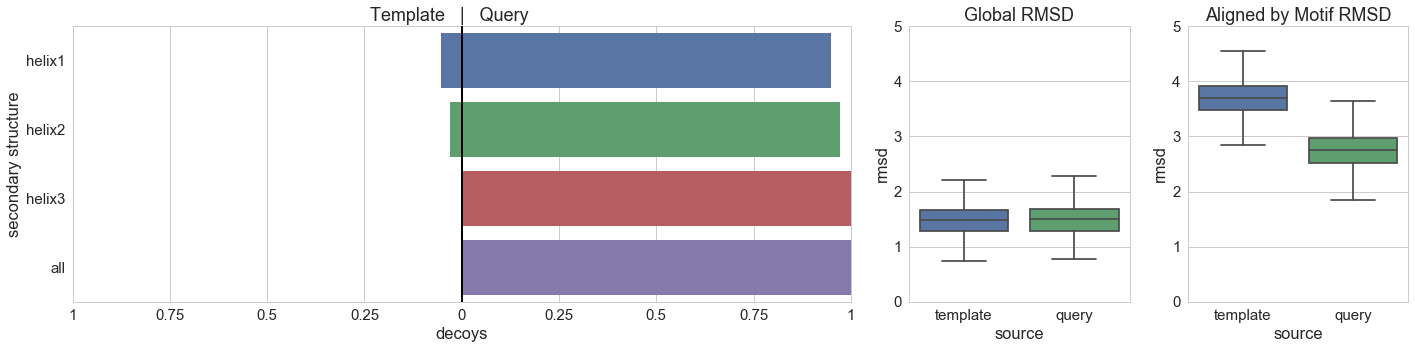

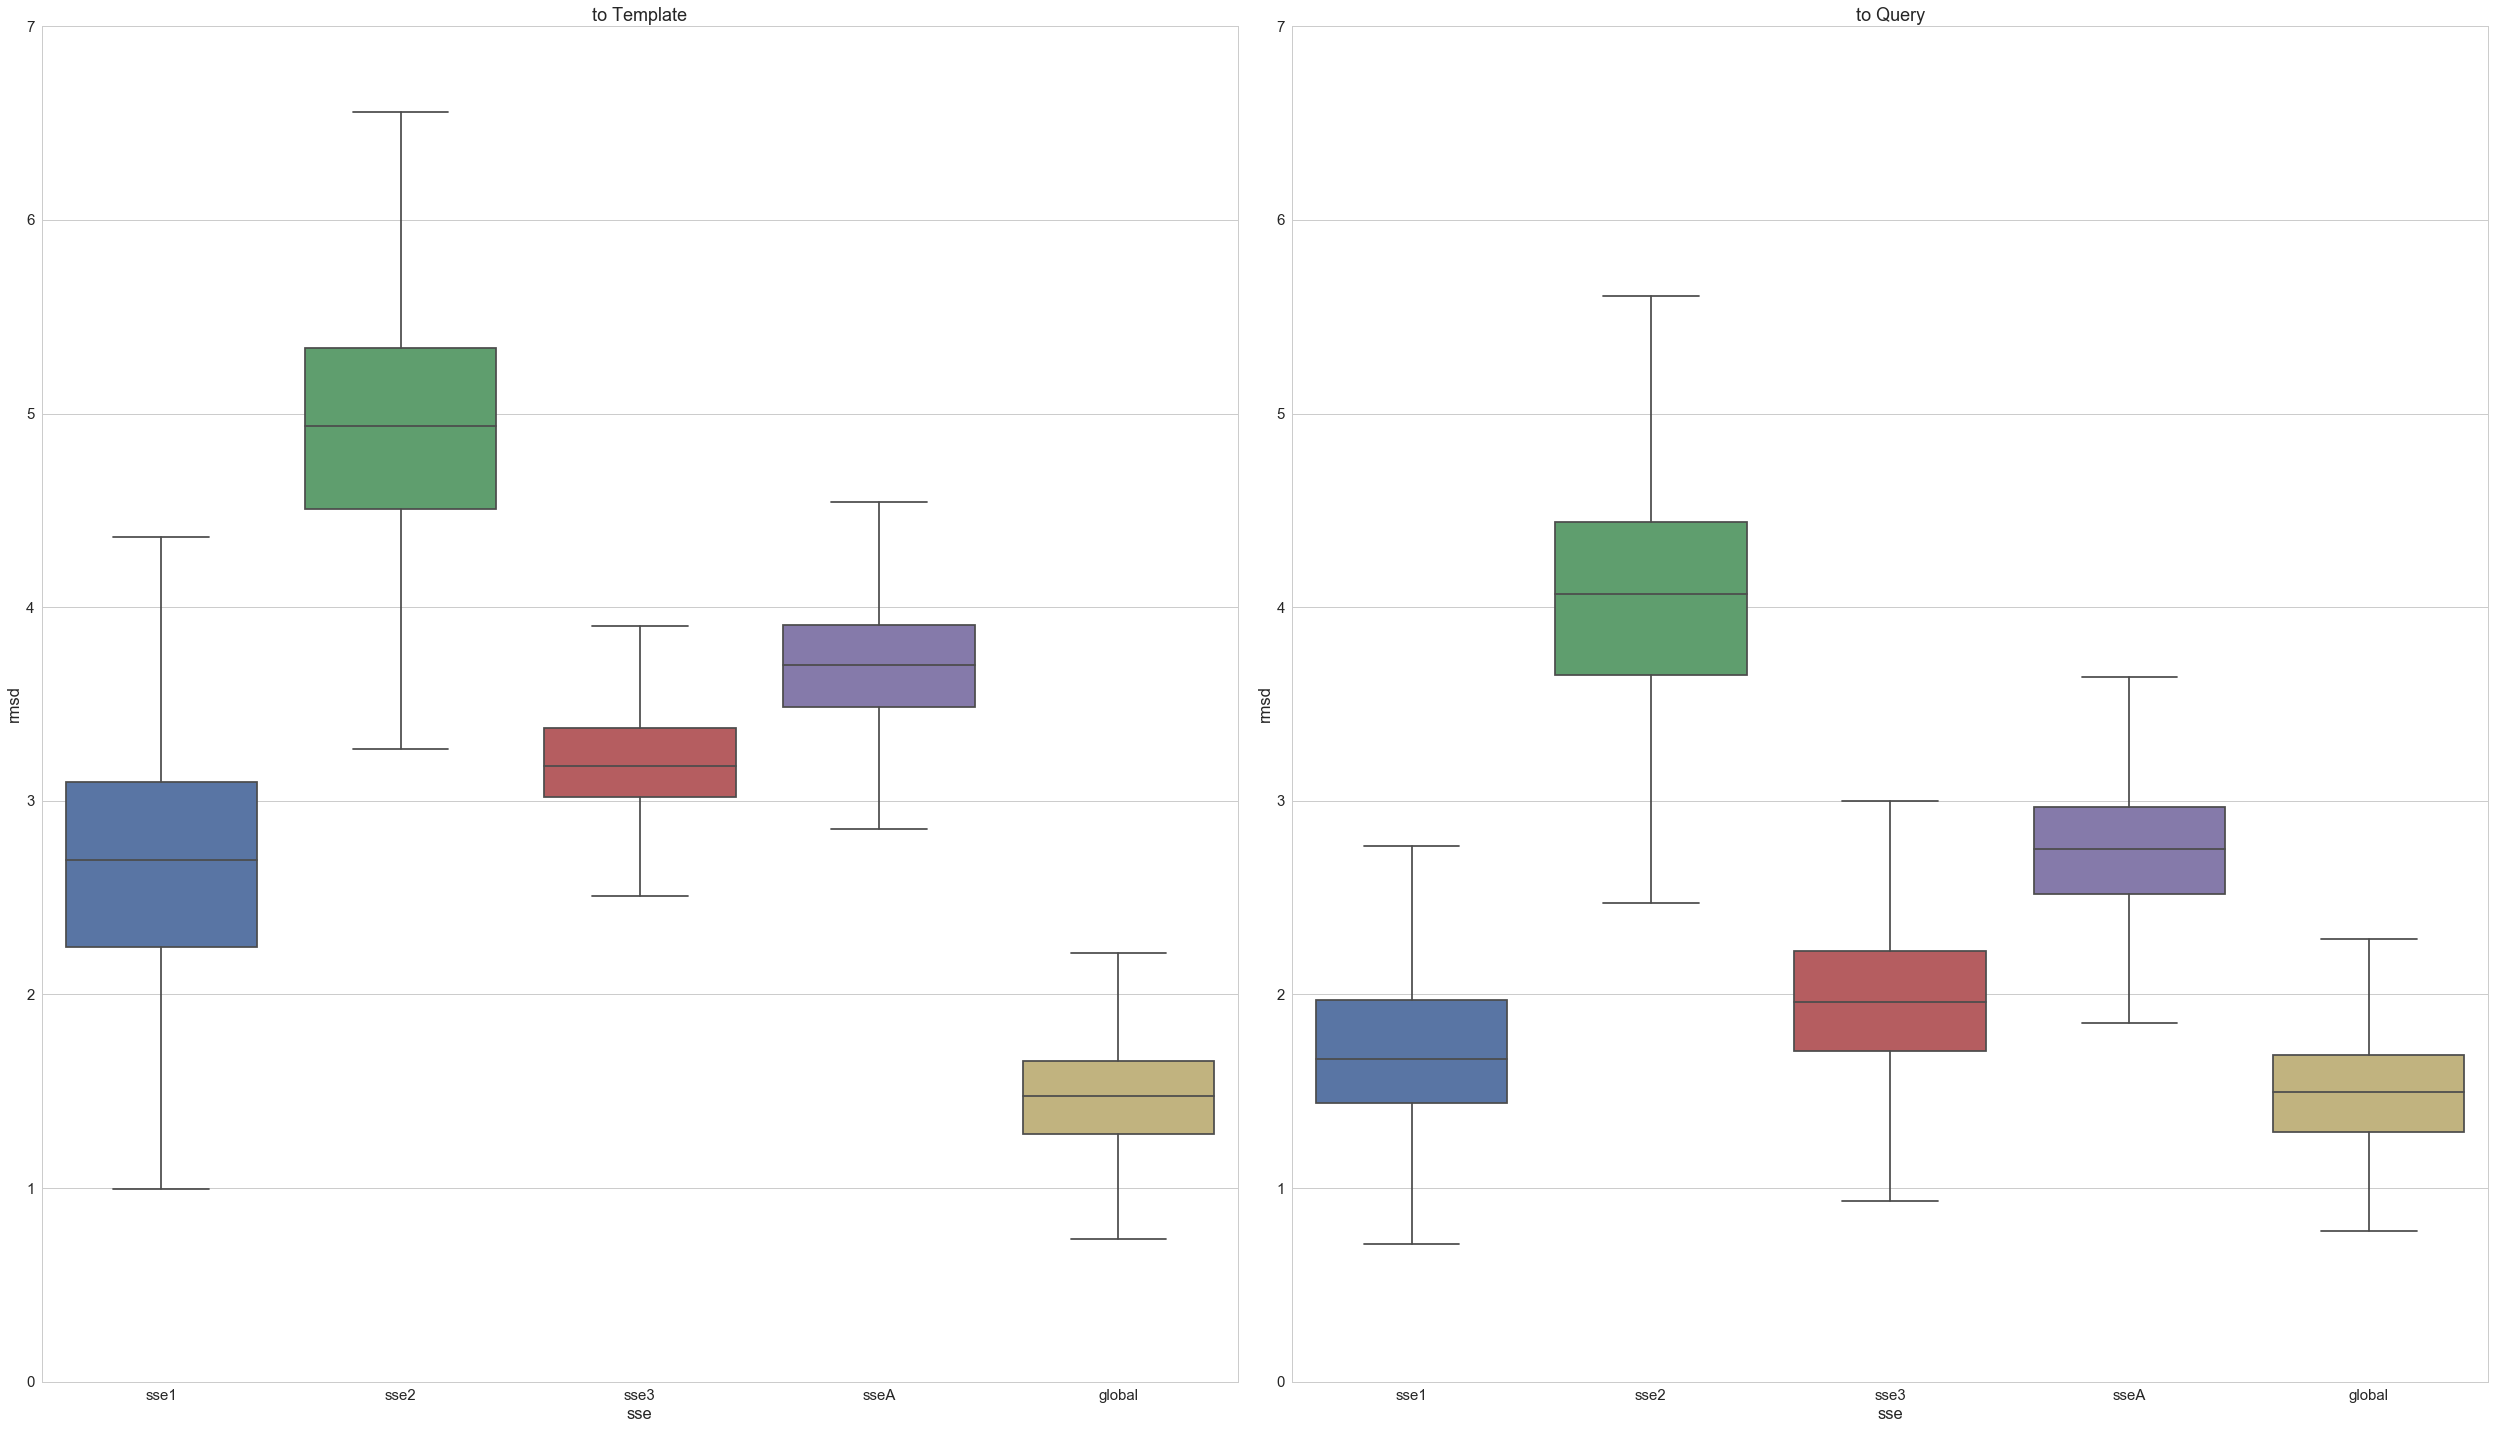

In [23]:
plot_pyramid(pf02179_pyr[pf02179_pyr["FFL"]=="FFLA"],
             pf02179_split[(pf02179_split["FFL"]=="FFLA")],
            ["helix1", "helix2", "helix3", "all"], 5)
plot_boxplots(pf02179_split[(pf02179_split["FFL"]=="FFLA")], 7)

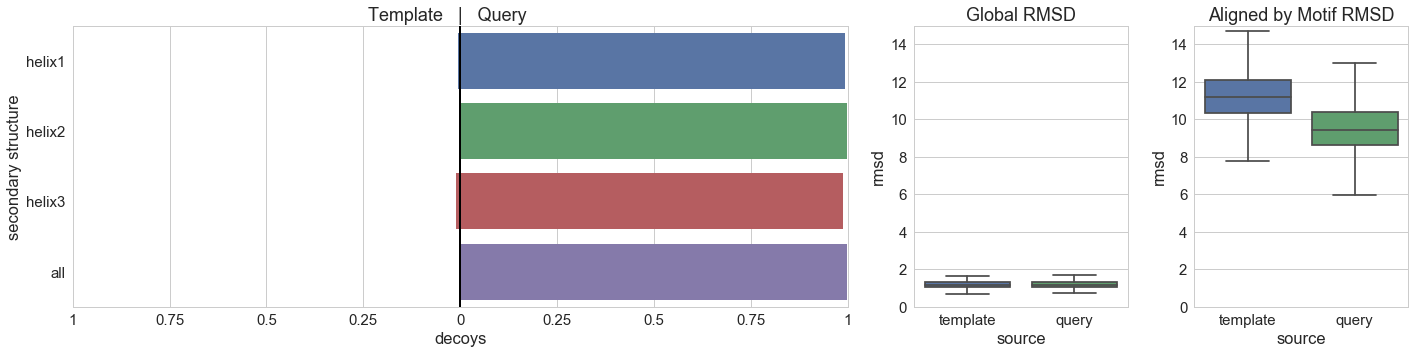

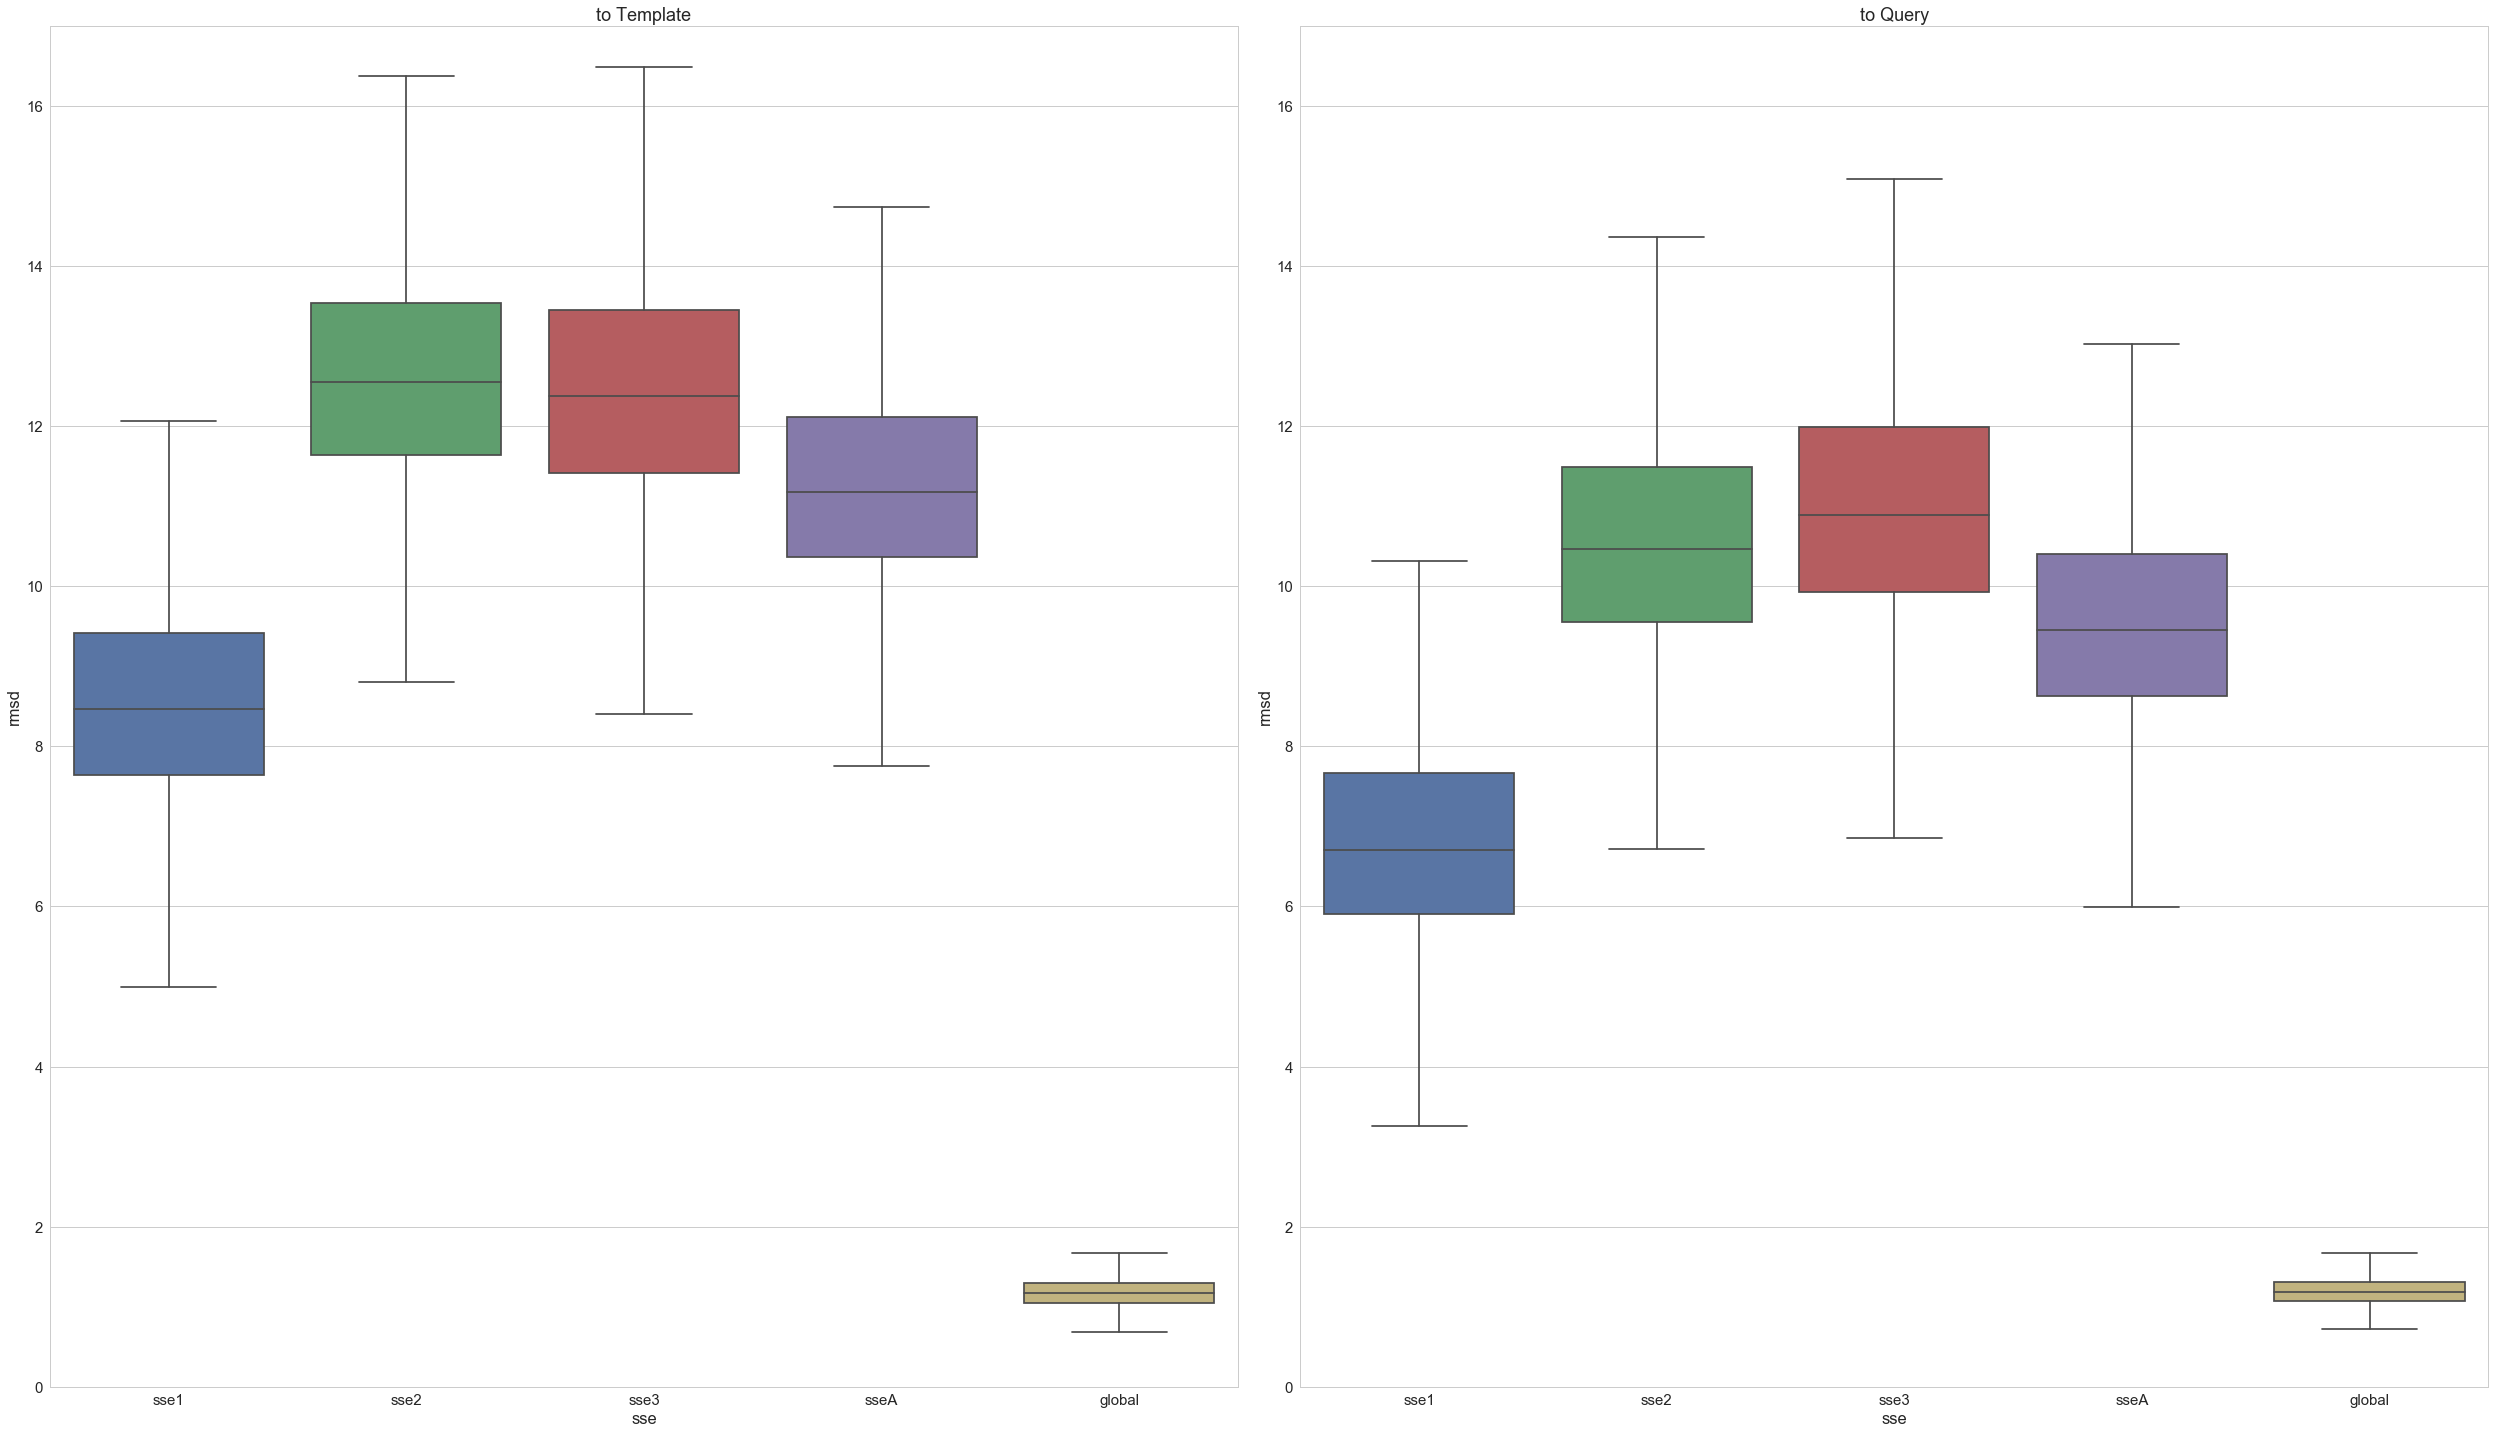

In [26]:
plot_pyramid(pf02179_pyr[pf02179_pyr["FFL"]=="FFLB"],
             pf02179_split[(pf02179_split["FFL"]=="FFLB")],
            ["helix1", "helix2", "helix3", "all"], 15)
plot_boxplots(pf02179_split[(pf02179_split["FFL"]=="FFLB")], 17)